# Importing Data and defining functions for feature engineering

1. Import Modules
2. Import data
3. Defining of functions
4. Applying and testing

## Importing Modules

In [1]:
import pandas as pd
import numpy as np

import functions as fu
from feature_engineering import *

# Pfade setzen
c_fold = fu.get_folder()
p_fold = c_fold + '\data\Prepared'

# Importing Data

In [9]:
# import Full Data
#df = fu.csv_einlesen(p_fold)


# import one dataset for developing
df = pd.read_csv(f"{p_fold}\\prepared_RW20.csv", index_col = 0)
print("Size of Dataframe: ",df.shape)

# create efficient  datetypes for more efficient memory usage
df[["batteryname",'comment','type']] = df[["batteryname",'comment','type']].astype("category")
df[['time','relativeTime','voltage','current','temperature']] = df[['time','relativeTime','voltage','current','temperature']].apply(pd.to_numeric, downcast="float")
df[['zyklus','step']] = df[['zyklus','step']].apply(pd.to_numeric, downcast="integer")

Size of Dataframe:  (1222375, 11)


# Defining of Functions

In [37]:
df['date'] = pd.to_datetime(df['date'])

# Applying and testing

In [ ]:
df = feature_creator(df,['voltage','current','temperature'],['batteryname','zyklus'],"mean")
df = feature_creator(df,['voltage','current','temperature'],['batteryname','zyklus'],"median")
df = feature_creator(df,['voltage','current','temperature'],['batteryname','zyklus'],"min")
df = feature_creator(df,['voltage','current','temperature'],['batteryname','zyklus'],"max")
df = feature_creator(df,['voltage','current','temperature'],['batteryname','zyklus'],"std")
df = feature_creator(df,['voltage','current','temperature'],['batteryname','zyklus'],"count")
df.head()

In [4]:
df = feature_creator(df,'voltage',['batteryname','zyklus'],"std",'10')

Das hier ist nur ein dummy - das Framing muss noch ergänzt werden


In [5]:
df.sample(5)

,batteryname,zyklus,step,comment,type,time,relativeTime,voltage,current,temperature,...,min_voltage_all,min_current_all,min_temperature_all,max_voltage_all,max_current_all,max_temperature_all,std_voltage_all,std_current_all,std_temperature_all,count_entrys_all
430162,RW20,11192,221,pulsed load (discharge),D,3523217.38,221.04,3.587,1.000,25.61923,...,3.550,0.999,25.01471,3.669,1.004,26.71977,0.025787,0.000400,0.517477,601
1074175,RW20,26237,145,charge (after random walk discharge),C,13427163.94,8700.04,4.200,-0.013,18.94355,...,4.199,-2.004,18.91224,4.200,-0.010,20.00802,0.000080,0.248035,0.332618,155
486963,RW20,12817,9,discharge (random walk),D,4010710.54,9.04,3.303,4.499,38.49382,...,3.239,4.499,38.40173,3.345,4.503,39.23057,0.026511,0.000562,0.261735,61
715577,RW20,18690,58,discharge (random walk),D,6340933.58,58.04,3.276,4.500,26.89028,...,3.275,4.499,25.03021,3.439,4.504,26.95228,0.036507,0.000632,0.576603,61
1006527,RW20,25010,411,pulsed load (discharge),D,11778505.19,411.04,3.695,1.000,21.41858,...,3.668,0.999,20.65905,3.881,1.003,21.72859,0.044657,0.000354,0.327551,601


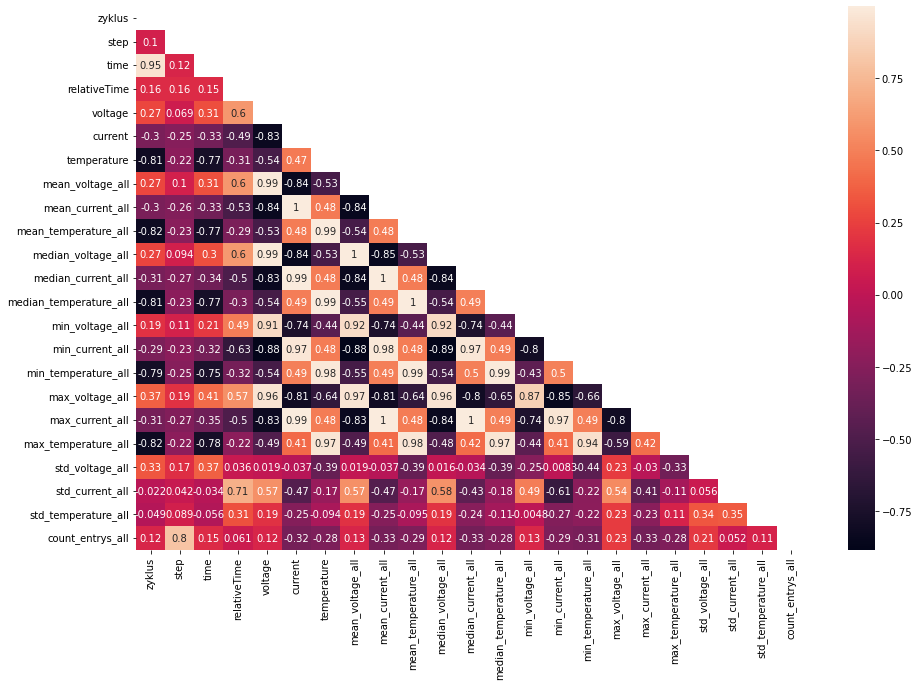

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = df

corrMatrix = data.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))


plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, annot=True,mask=mask)
plt.draw()